In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#EDA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#importing classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('WineQT.csv') #provide location of the dataset

In [3]:
#Id is not required, hence dropping it
df.drop(['Id'], axis=1, inplace=True)

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Description of Features
* **fixed acidity** - most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
* **volatile acidity** - the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
* **citric acid** - found in small quantities, citric acid can add 'freshness' and flavor to wine residual sugar- the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter
* **chlorides** - the amount of salt in the wine
* **free sulfur dioxide** - the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion
* **total sulfur dioxide** -amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2.
* **density** - the density of water is close to that of water depending on the percent alcohol and sugar content
* **pH** - describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic)
* **sulphates** - a wine additive which can contribute to sulfur dioxide gas (S02) levels
* **alcohol** - the percent alcohol content of the wine
* **quality** - output variable (based on sensory data, score between 0 and 10)

In [5]:
df.shape

(1143, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

* All the features are numerical
* There are no null/nan values in the datasset

## Exploratory Data Analysis
##### 1.1 Familiarise yourself with the Wine Quality Dataset on Kaggle. Conduct an initial exploratory analysis of the dataset.

In [8]:
df['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

Text(0.5, 1.0, 'Countplot of the wine quality')

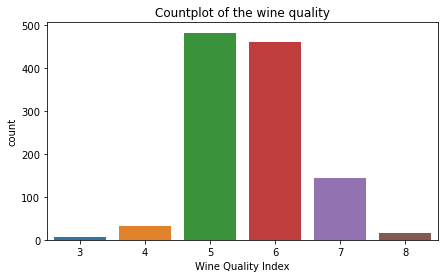

In [9]:
plt.figure(figsize = (7,4))
sns.countplot(data = df, x = 'quality')
plt.xlabel("Wine Quality Index")
plt.title("Countplot of the wine quality")

* Majority of the wine lies between 5 to 6 index values

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From the above table, the 75% of the data for the "free sulfur dioxide" and "total sulfur dioxide" upto the max value has a huge difference, indicating the possibility of outliers in the data.

<AxesSubplot:xlabel='free sulfur dioxide'>

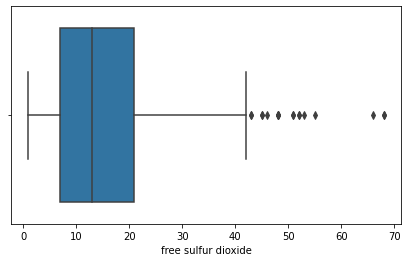

In [11]:
#checking outliers using boxplots
plt.figure(figsize=(7,4))
sns.boxplot(df['free sulfur dioxide'])

<AxesSubplot:xlabel='total sulfur dioxide'>

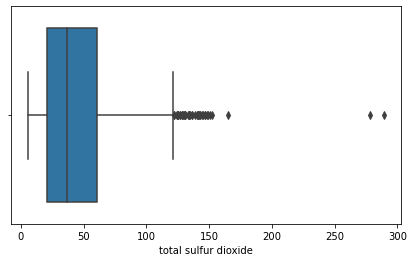

In [12]:
#checking outliers using boxplots
plt.figure(figsize=(7,4))
sns.boxplot(df['total sulfur dioxide'])

In [16]:
#checking multicolinearity between free and total sulfur dioxide
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#adding constant to validate VIF
Xdf = add_constant(df)

The statsmodels function variance_inflation_factor requires a constant in the matrix of explanatory variables, therefore we added the constant with the help of the add_constant function fron statsmodels.

In [18]:
Xdf.head()

,const,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1.0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,1.0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,1.0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,1.0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:
X_variables = Xdf[['free sulfur dioxide','total sulfur dioxide', 'const']]
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]

print(vif_data)

                feature       VIF
0   free sulfur dioxide  1.776337
1  total sulfur dioxide  1.776337
2                 const  3.598040


In [23]:
#checking multicolinearity between fixed and volatile acidity
X_variables = Xdf[['fixed acidity', 'volatile acidity', 'const']]
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]

print(vif_data)

            feature        VIF
0     fixed acidity   1.067082
1  volatile acidity   1.067082
2             const  42.033525


In [20]:
#checking multicolinearity between fixed and volatile acidity
# X_variables = df[['fixed acidity', 'volatile acidity']]
vif_data = pd.DataFrame()
vif_data["feature"] = Xdf.columns
vif_data["VIF"] = [round(variance_inflation_factor(Xdf.values, i), 2) for i in range(len(Xdf.columns))]

print(vif_data)

                 feature         VIF
0                  const  1710811.01
1          fixed acidity        7.78
2       volatile acidity        1.88
3            citric acid        3.22
4         residual sugar        1.74
5              chlorides        1.55
6    free sulfur dioxide        1.91
7   total sulfur dioxide        2.12
8                density        6.60
9                     pH        3.40
10             sulphates        1.50
11               alcohol        3.41
12               quality        1.60


Keeping the threshold for VIF fo 10, we can see that none of the features have a VIF > 10, hence there is no multicolinearity in the dataset.

<AxesSubplot:>

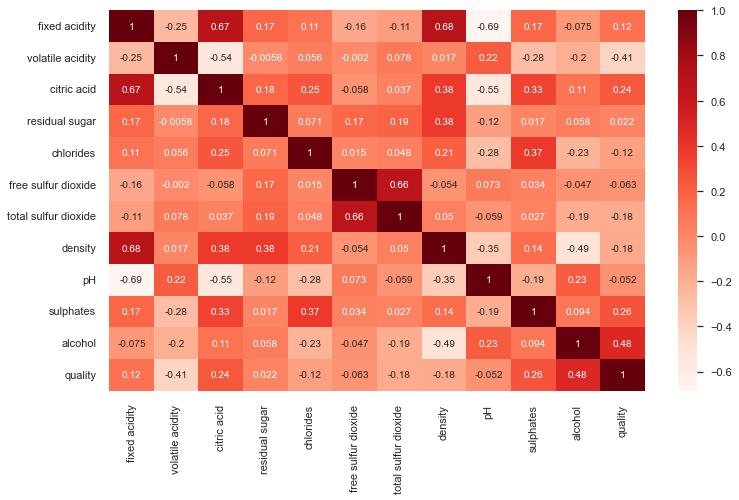

In [344]:
#correlation heatmap
plt.figure(figsize = (12,7))
sns.heatmap(df.corr(), annot = True, cmap="Reds", mask=False)

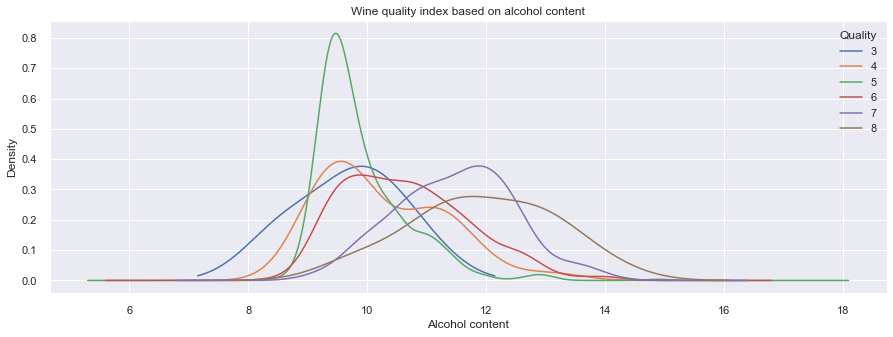

In [345]:
plt.figure(figsize =(15,5))
ax = df.groupby('quality')['alcohol'].plot(kind='kde', legend=True)
plt.title('Wine quality index based on alcohol content')
plt.xlabel('Alcohol content')
plt.legend(title="Quality")

From the above chart
* The majority of the wine quality 5 will have alcohol content <10%
* Top quality wine i.e. 7 and 8 generally have more alcohol content
* Most of the other low quality wines have less than 12% alcohol

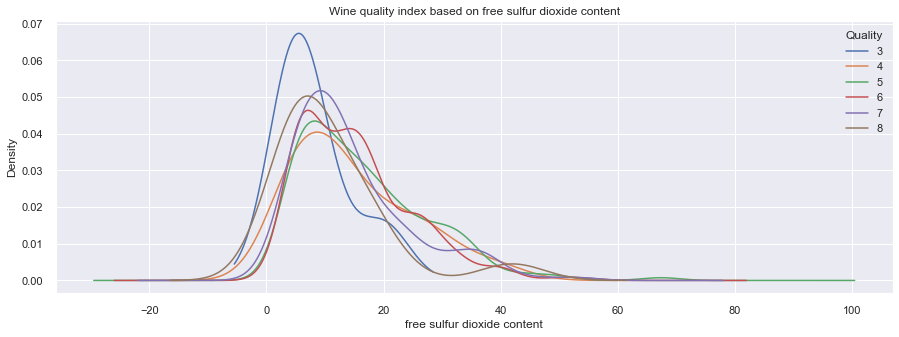

In [346]:
plt.figure(figsize =(15,5))
ax = df.groupby('quality')['free sulfur dioxide'].plot(kind='kde', legend=True)
plt.title('Wine quality index based on free sulfur dioxide content')
plt.xlabel('free sulfur dioxide content')
plt.legend(title="Quality")

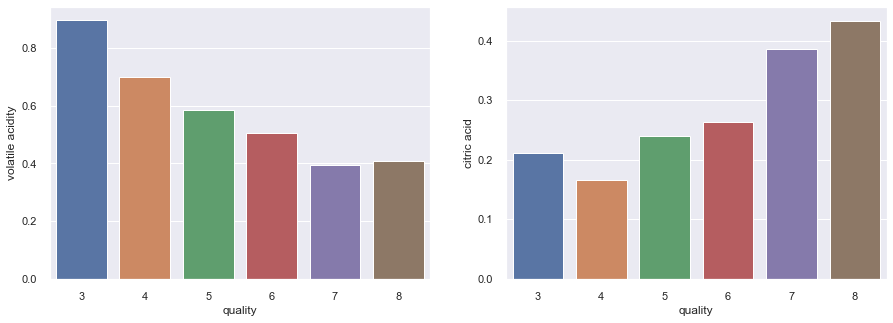

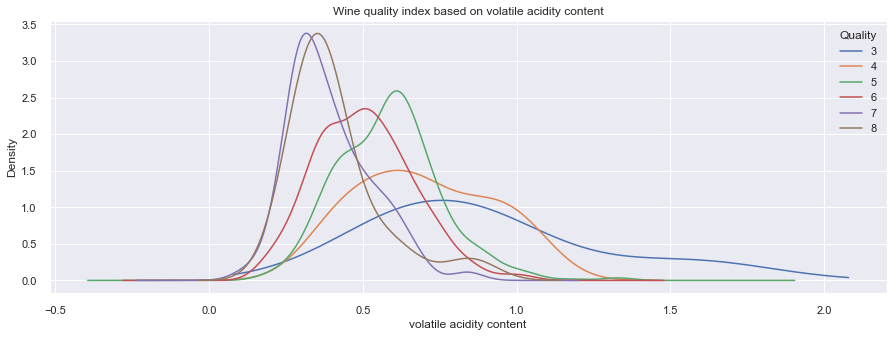

In [347]:
fig = plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(data =df,x ='quality',y = 'volatile acidity', ci=False)
plt.subplot(122)
sns.barplot(data =df,x ='quality',y = 'citric acid', ci=False)

plt.figure(figsize =(15,5))
ax = df.groupby('quality')['volatile acidity'].plot(kind='kde', legend=True)
plt.title('Wine quality index based on volatile acidity content')
plt.xlabel('volatile acidity content')
plt.legend(title="Quality")

* Lesser the volatile acidity, finer the wine.
* High citric acid gives better wine

In [348]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


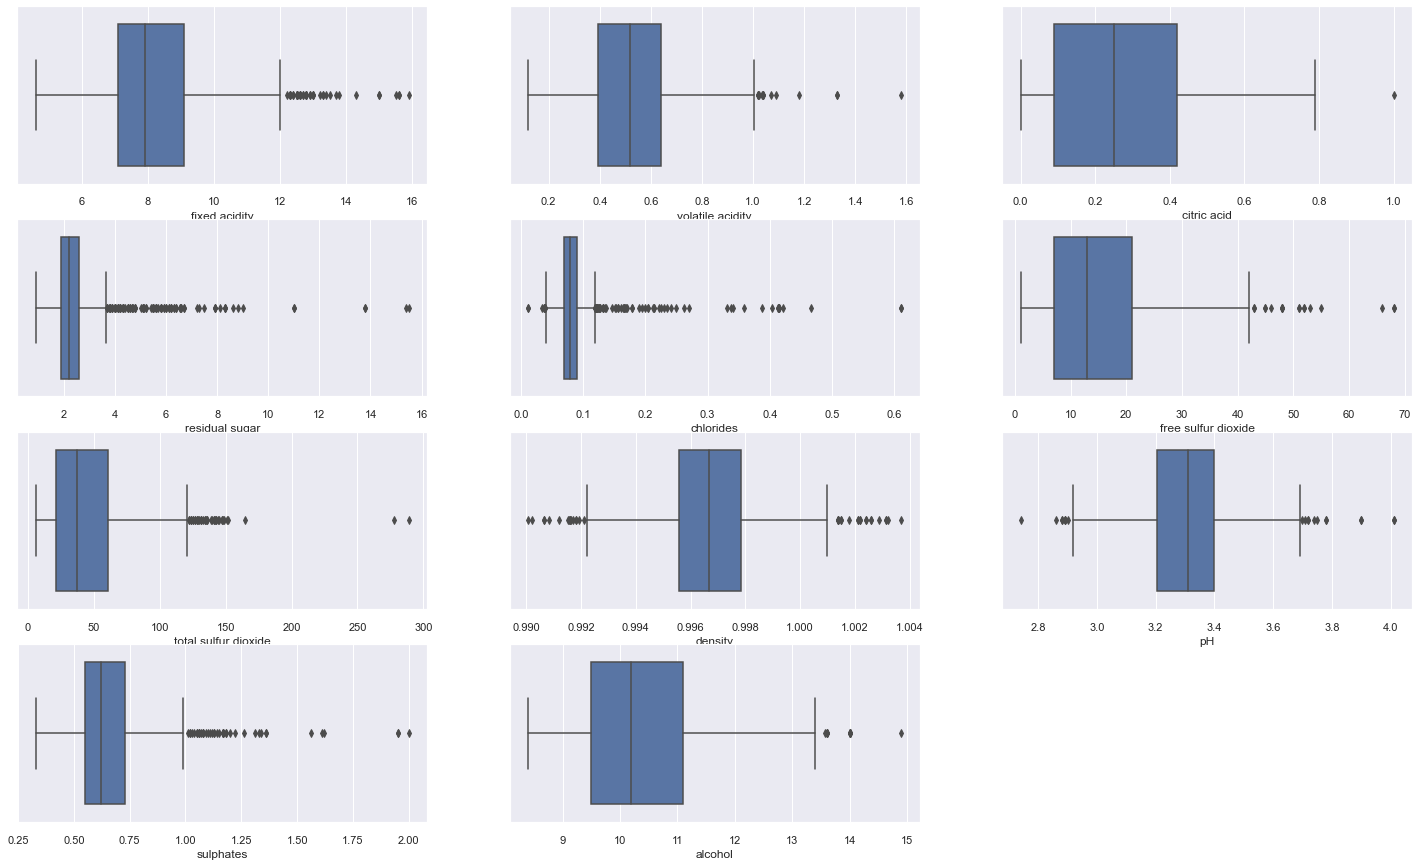

In [349]:
# Check for outliers using boxplots
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
i=1
fig = plt.figure(figsize = (25,15))
for col in columns:
    sns.set(style="darkgrid")
    plt.subplot(4,3,i)
    sns.boxplot(df[col])
    i+=1

In [350]:
#detecting and handling outliers
for col in columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    min_Value = q1-1.5*IQR
    max_Value = q3+1.5*IQR

    outliers = []
    for i in df[col]:
        #print(i)
        if i< min_Value or i>max_Value:
            outliers.append(i)
    print(f"Outliers in {col}:",outliers, "\n")

Outliers in fixed acidity: [12.8, 12.8, 15.0, 15.0, 12.5, 13.3, 13.4, 12.5, 13.8, 13.5, 12.6, 12.5, 12.8, 12.8, 13.7, 12.2, 12.5, 12.8, 12.3, 12.3, 12.6, 15.6, 12.5, 13.0, 12.5, 13.3, 12.5, 12.9, 14.3, 12.4, 15.5, 15.6, 13.0, 12.7, 13.0, 12.7, 12.3, 12.3, 12.4, 13.2, 15.9, 12.9, 12.6, 12.6] 

Outliers in volatile acidity: [1.02, 1.07, 1.33, 1.33, 1.04, 1.09, 1.04, 1.02, 1.035, 1.025, 1.02, 1.58, 1.18, 1.04] 

Outliers in citric acid: [1.0] 

Outliers in residual sugar: [5.5, 5.9, 4.65, 4.65, 5.5, 5.5, 5.5, 7.3, 7.2, 5.6, 4.0, 4.0, 4.0, 4.0, 6.4, 5.6, 5.6, 11.0, 11.0, 4.5, 4.8, 5.8, 5.8, 6.2, 4.2, 7.9, 7.9, 4.5, 6.7, 6.6, 3.7, 5.2, 15.5, 8.3, 6.55, 6.55, 6.1, 4.3, 5.8, 5.15, 6.3, 4.2, 4.6, 4.2, 4.3, 4.3, 7.9, 5.1, 5.6, 8.6, 7.5, 6.0, 3.9, 4.2, 4.0, 6.6, 6.0, 3.8, 9.0, 8.8, 5.0, 3.8, 4.1, 5.9, 4.1, 6.2, 4.0, 3.9, 4.0, 8.1, 6.4, 8.3, 8.3, 4.7, 5.5, 5.5, 4.3, 5.5, 3.7, 6.2, 5.6, 4.6, 5.8, 4.1, 4.3, 4.8, 6.3, 4.5, 4.5, 4.3, 3.8, 5.4, 6.1, 5.1, 5.1, 3.9, 15.4, 4.8, 5.2, 3.75, 13.8, 13.8, 5.7

* There are a few outliers in the dataset. Detected outside the 1.5 times of interquartile range (IQR). 

In [351]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [368]:
from scipy.stats.mstats import winsorize
var=list(df.select_dtypes(include=['float64']).columns)
for col_name in var:    
    df[col_name] = winsorize(df[col_name], limits=[0.05, 0.05],inclusive=(True, True))

We replaced the outliers with the upper and lower percentile values, i.e. top 5% of the data replaced by the 95th percentile value and same for lower 5% with value at 5th percentile. This is the most recommended method to deal with outliers when we have less data.

In [364]:
# def clip_series(s, lower, upper):
#     clipped = s.clip(lower=s.quantile(lower), upper=s.quantile(upper), axis=0)
#     return clipped

# # Manage list of features to be winsorized
# feature_list = list(df_remove_quant.columns)

# for f in feature_list:
# #     print(f)
#     df_remove_quant[f] = clip_series(df_remove_quant[f], 0.05, 0.95)

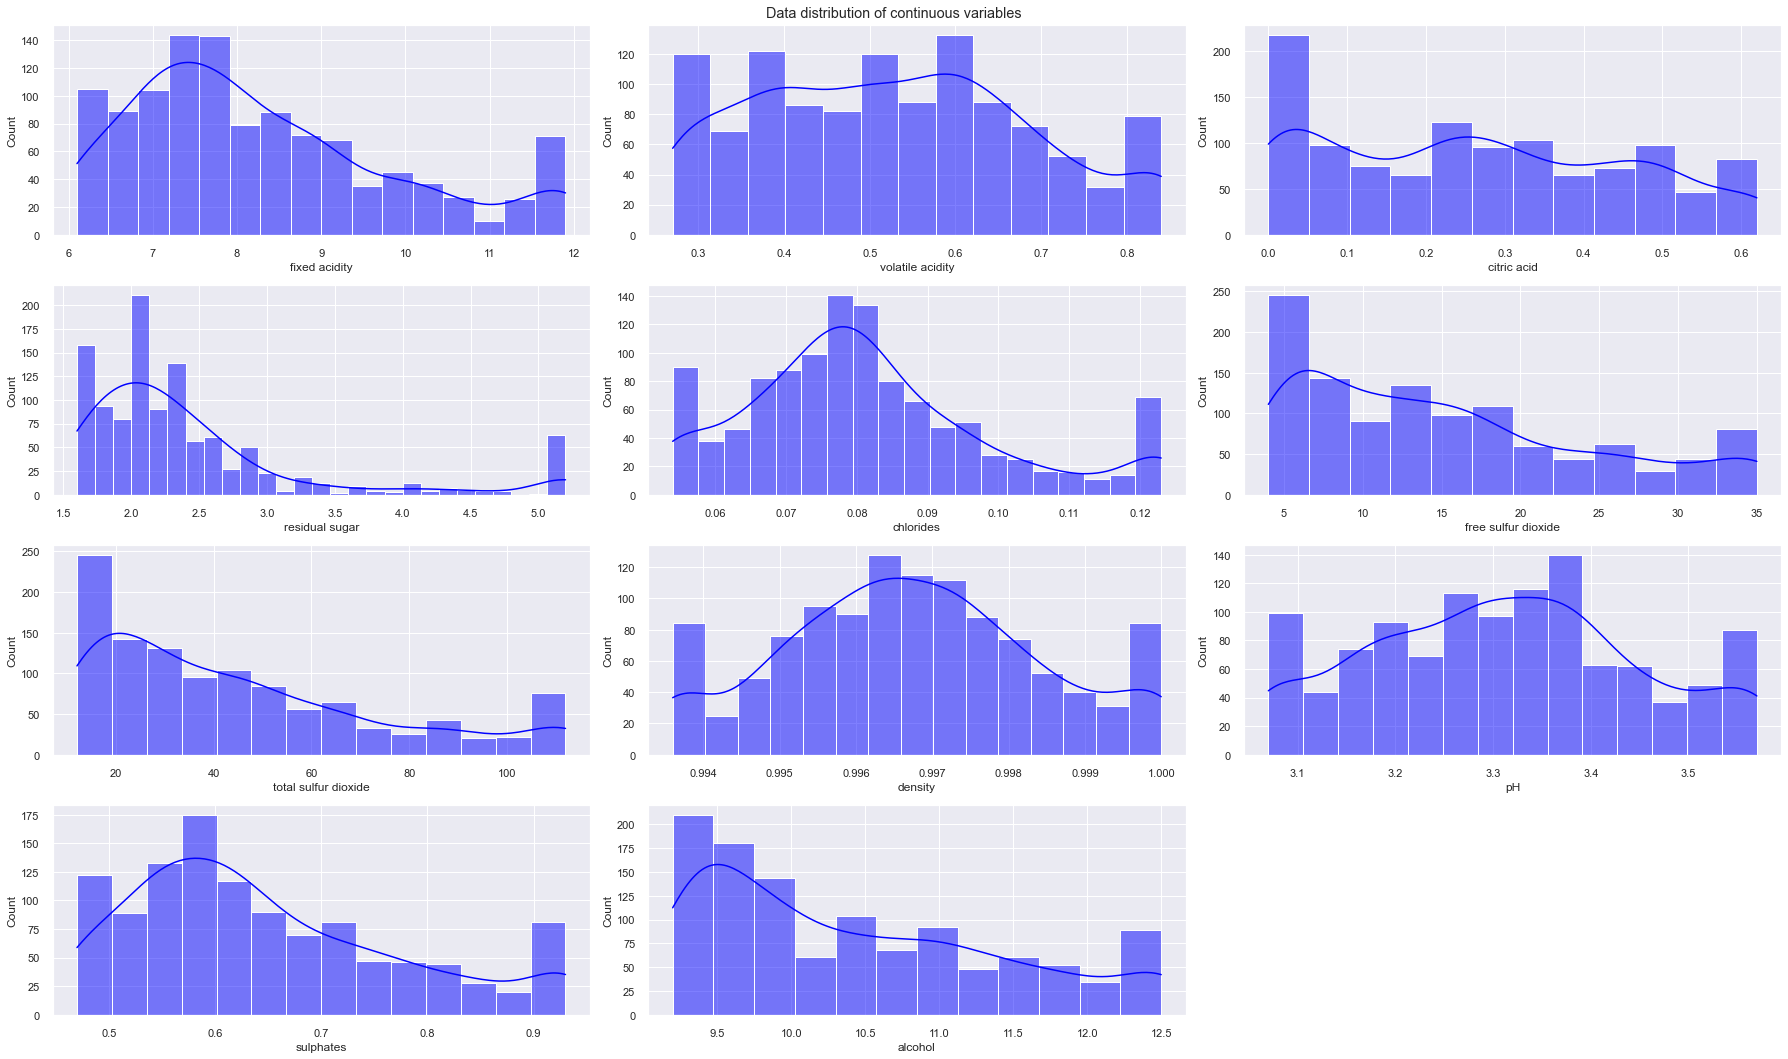

In [369]:
#Distribution after treating outliers
plt.figure(figsize=(25, 15))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    ax = plt.subplot(4,3, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='blue',kde=True)
    plt.suptitle('Data distribution of continuous variables')
    plt.tight_layout()

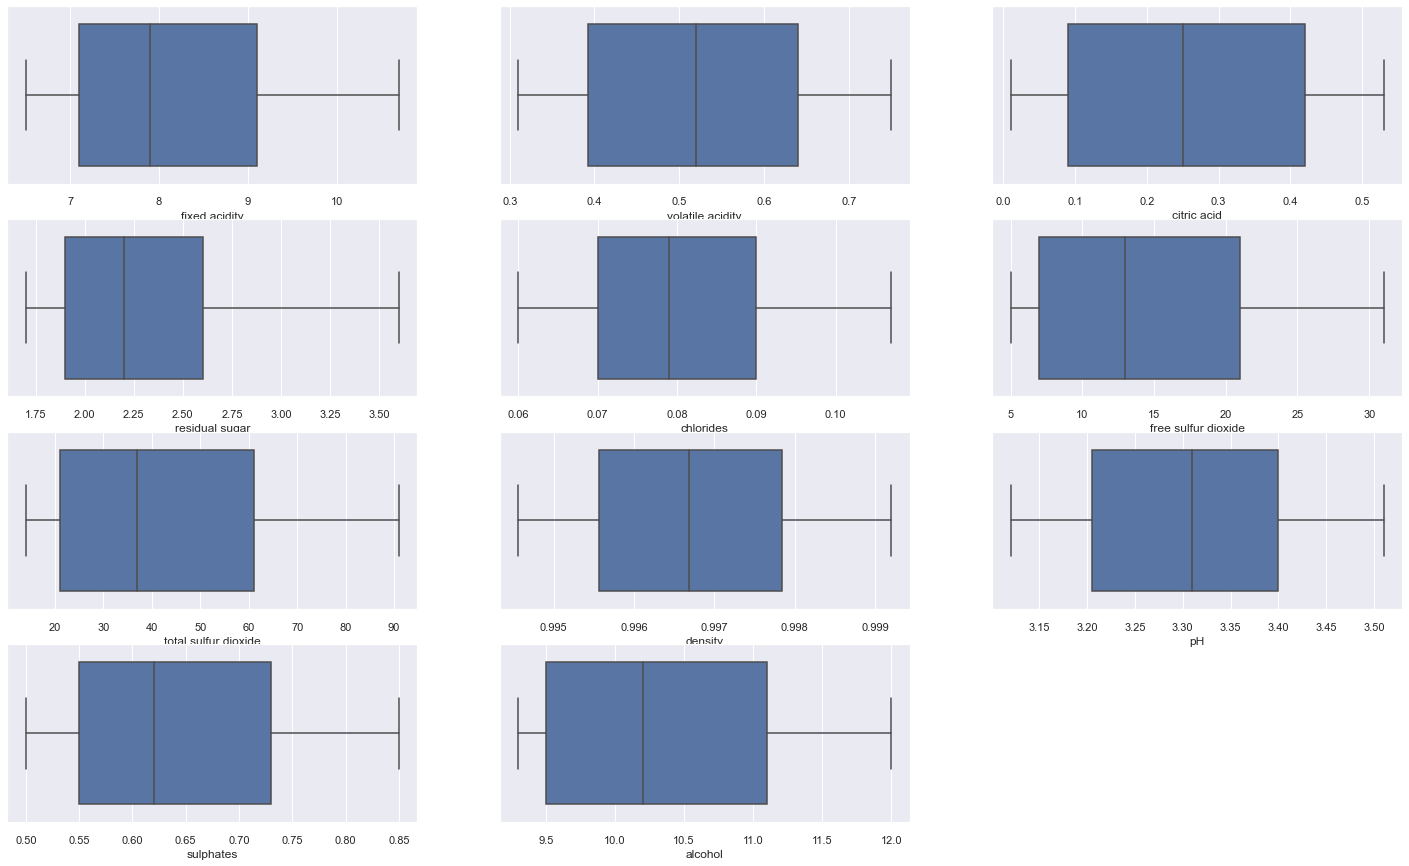

In [288]:
#boxplots after treating outliers
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
i=1
fig = plt.figure(figsize = (25,15))
for col in columns:
    sns.set(style="darkgrid")
    plt.subplot(4,3,i)
    sns.boxplot(df[col])
    i+=1

#### 1.2 Does the data include any distinct groups of wines? If so, please identify and present these appropriately.

Text(0.5, 1.0, 'scatter plot of fixed acidity vs alcohol')

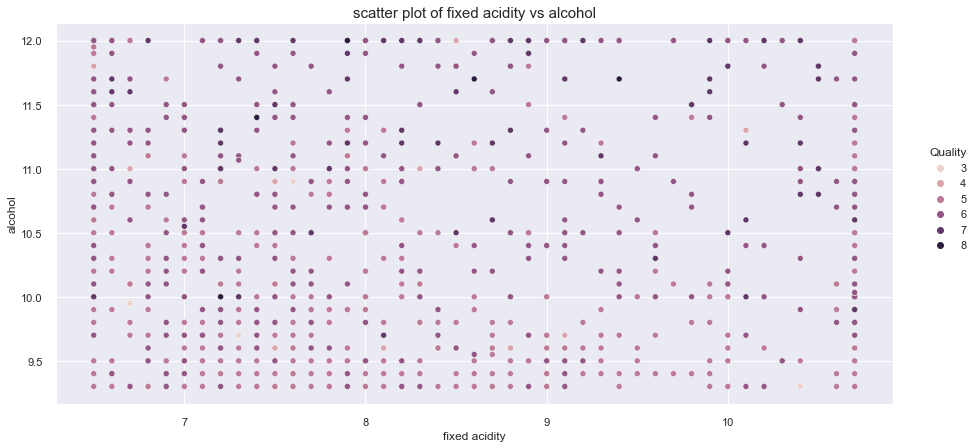

In [241]:
plt.figure(figsize=(15,7))
sns.scatterplot(data = df ,x ='fixed acidity',y='alcohol',hue ='quality')
plt.legend(bbox_to_anchor =(1.1, 0.7), title = 'Quality')
plt.title("scatter plot of fixed acidity vs alcohol", fontsize = 15)

There are no distinct groups of wines in this dataset. Although, there are different wine qualities ranging from 3 to 8. We can create bins to define groups of wines, say wines having quality 0-4 could be grouped low quality, 5-7 as medium, and 7-9 as high. Hence, we get 3 distinct groups of wines.

In [370]:
df_binned = df.copy()
bins = [0,5,7,9]
labels = ['Low', 'Medium', 'High']
df_binned['quality_bins'] = pd.cut(df['quality'], bins=bins, labels=labels,  right=False, include_lowest=True)

In [371]:
df_binned.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_bins
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium
1,7.8,0.84,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium


In [372]:
df_q7 = df_binned.loc[df['quality'] < 5]
df_q7.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_bins
1044,6.7,0.84,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.00,4,Low
1046,7.3,0.84,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3,Low
1055,7.1,0.84,0.05,5.2,0.082,4.0,14.0,0.99808,3.40,0.52,10.20,3,Low
1057,6.1,0.62,0.03,1.6,0.080,6.0,13.0,0.99498,3.57,0.62,10.10,4,Low
1074,6.7,0.76,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3,Low


In [373]:
df_binned['quality_bins'].value_counts()

Medium    945
High      159
Low        39
Name: quality_bins, dtype: int64

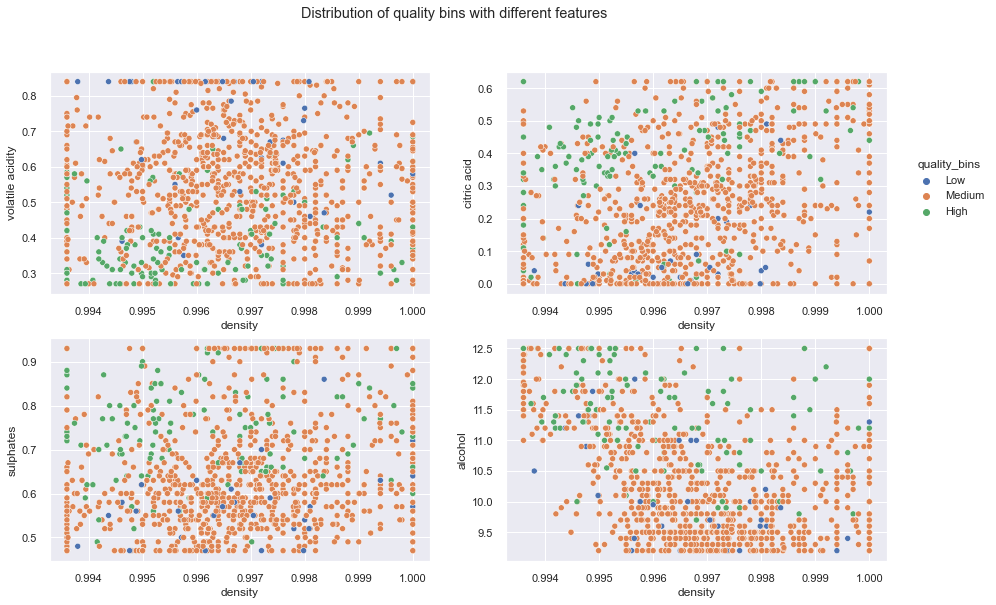

In [374]:
columns = ['volatile acidity', 'citric acid', 'sulphates', 'alcohol']
i=1
fig = plt.figure(figsize = (15,9))
for col in columns:
    sns.set(style="darkgrid")
    plt.subplot(2,2,i)
    ax = sns.scatterplot(data = df_binned ,x ='density',y=col, hue='quality_bins')
    ax.get_legend().remove()
    i+=1

# add legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='right', bbox_to_anchor=(1, 0.7), title="quality_bins")
fig.suptitle('Distribution of quality bins with different features')

plt.show()

From the above scatterr plots:
* high quality wines have high citric acid, low density, low volatile acidity, and high alcohol content in them.
* records of medium wines are more, therefore we can say from the plot, medium quality wines tend to have medium to high density with high volatile acidity, low citric acid and alcohol.


In [213]:
# !pip install yellowbrick

##### Kmeans clustering to show if there are any distinct groups of wines in the dataset

In [375]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

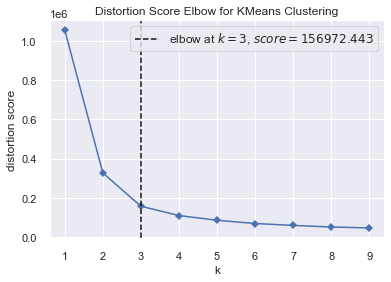

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [376]:
model = KMeans()
visualizer = KElbowVisualizer(model,k=(1,10),timings=False)
visualizer.fit(df)
visualizer.show()

Since there are no distinct groups, we will do PCA to get the features that explain the threshold variance.

In [404]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3'])

In [405]:
principalDf.shape

(1143, 3)

In [406]:
df.shape

(1143, 12)

In [407]:
kmeans = KMeans(n_clusters = 3)
label = kmeans.fit_predict(principalComponents)
unique_labels = np.unique(label)

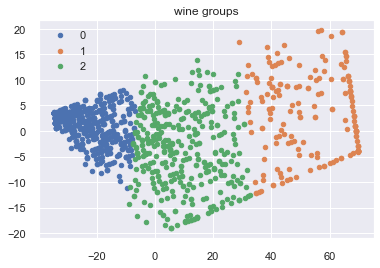

In [410]:
for i in unique_labels:
    plt.scatter(principalComponents[label==i,0],principalComponents[label==i,1],label=i,s=20)
    
plt.legend()
plt.title("wine groups")
plt.show()

In [409]:
pca.explained_variance_ratio_

array([0.95046084, 0.04436282, 0.00267958])

AS you can see, when we did PCA, there are 3 distince groups of wines as shown in the above graph. 95% of the variance in the data is explained by the first principal component itself.

#### 1.3 Please build a model to predict the quality score that a new wine will receive. What are the advantages and drawbacks of the method that you have chosen?

In [497]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.287927,1.568387,6.1000,7.10000,7.90000,9.100000,11.900
volatile acidity,1143.0,0.527301,0.159852,0.2700,0.39250,0.52000,0.640000,0.840
citric acid,1143.0,0.265197,0.189923,0.0000,0.09000,0.25000,0.420000,0.620
residual sugar,1143.0,2.441076,0.882605,1.6000,1.90000,2.20000,2.600000,5.200
chlorides,1143.0,0.081454,0.017477,0.0540,0.07000,0.07900,0.090000,0.123
free sulfur dioxide,1143.0,15.285214,9.165200,4.0000,7.00000,13.00000,21.000000,35.000
total sulfur dioxide,1143.0,44.859580,28.878038,12.0000,21.00000,37.00000,61.000000,112.000
density,1143.0,0.996732,0.001684,0.9936,0.99557,0.99668,0.997845,1.000
pH,1143.0,3.310709,0.137449,3.0700,3.20500,3.31000,3.400000,3.570
sulphates,1143.0,0.647585,0.126784,0.4700,0.55000,0.62000,0.730000,0.930


In [412]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [498]:
df['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

As you can see, the wine quality types for 4, 8, and 3 are too less compared to other types. Therefore we will apply the Synthetic Minority Oversampling Technique (SMOTE) to increase the samples for minority class. This is done to avoid high bias, underfitting issues in our model.

In [24]:
# !pip install imblearn

In [501]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X,y = smote.fit_resample(X,y)

In [505]:
# quality feature after applying smote
y.value_counts()

5    483
6    483
7    483
4    483
8    483
3    483
Name: quality, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,stratify=y,random_state=0)

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [508]:
model_comparison={}

In [572]:
model_dict = {"logistic regression": LogisticRegression(solver='liblinear', random_state=70),
             "random forest": RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0),
             "svc": SVC(kernel = 'rbf', random_state = 0),
             'decision tree': DecisionTreeClassifier(criterion = 'entropy', random_state = 0)}

In [600]:
def build_model(model_name):
    global Important_features
    model = model_dict.get(model_name)
    model = model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    f1score = metrics.f1_score(y_pred,y_test,average='weighted')
    
    # Finding important features from data using Logistic Regression model
    if model_name != 'svc' and model_name!='logistic regression':
        important = model.feature_importances_

        Features_important={}
        featureNames = X.columns.values
        if model_name != 'decision tree' and model_name!='logistic regression':
            for i in range(len(important)):
                Features_important[featureNames[i]]=important[i]

            Important_features = dict(sorted(Features_important.items(),key= lambda x:x[1],reverse=True))
        else:
            pass
    else:
        pass
    
    report = classification_report(y_pred,y_test, zero_division=1)
        
    
    #kfold cross vallidation
    kfold = KFold(n_splits=5)
    cv = cross_val_score(model,X_train,y_train,cv=kfold)
    
    if model_name != 'svc':
        return accuracy, f1score, cv, Important_features, report
    else:
        return accuracy, f1score, cv, report

#### Random Forest model

In [601]:
rf_acc, rf_f1, rf_cv, imp_features, clf_report = build_model('random forest')

In [602]:
print(f"Accuracy of the Random Forest model: {round(rf_acc*100, 2)}%\n")
print(f"f1 score of the Random Forest model: {round(rf_f1*100, 2)}%\n")
print(f"Cross validation accuracy of the Random Forest model: {round(np.mean(rf_cv)*100, 2)}%\n")
print("Classification Report:\n", clf_report)

Accuracy of the Random Forest model: 82.24%

f1 score of the Random Forest model: 82.81%

Cross validation accuracy of the Random Forest model: 81.84%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97       102
           1       0.93      0.86      0.89       105
           2       0.57      0.64      0.60        86
           3       0.56      0.64      0.60        84
           4       0.89      0.80      0.84       107
           5       0.99      0.99      0.99        96

    accuracy                           0.82       580
   macro avg       0.82      0.81      0.82       580
weighted avg       0.84      0.82      0.83       580



In [621]:
model_comparison['Random Forest']=[rf_acc,
                                   rf_f1,
                                   np.mean(rf_cv)]

#### Decision Tree model

In [604]:
dt_acc, dt_f1, dt_cv, imp_features, clf_report = build_model('decision tree')

In [605]:
print(f"Accuracy of the Decision Tree model: {round(dt_acc*100, 2)}%\n")
print(f"f1 score of the Decision Tree model: {round(dt_f1*100, 2)}%\n")
print(f"Cross validation accuracy of the Decision Tree model: {round(np.mean(dt_cv)*100, 2)}%\n")
print("Classification Report:\n", clf_report)

Accuracy of the Decision Tree model: 77.59%

f1 score of the Decision Tree model: 77.78%

Cross validation accuracy of the Decision Tree model: 76.53%

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       101
           1       0.88      0.85      0.86       100
           2       0.54      0.65      0.59        80
           3       0.55      0.51      0.53       104
           4       0.78      0.77      0.78        99
           5       0.92      0.92      0.92        96

    accuracy                           0.78       580
   macro avg       0.78      0.77      0.77       580
weighted avg       0.78      0.78      0.78       580



In [622]:
model_comparison['Decision Tree']=[dt_acc,
                                   dt_f1,
                                   np.mean(dt_cv)]

#### SVC model

In [607]:
svc_acc, svc_f1, svc_cv, clf_report = build_model('svc')

In [608]:
print(f"Accuracy of the SVC model: {round(svc_acc*100, 2)}%\n")
print(f"f1 score of the SVC model: {round(svc_f1*100, 2)}%\n")
print(f"Cross validation accuracy of the SVC model: {round(np.mean(svc_cv)*100, 2)}%\n")
print("Classification Report:\n", clf_report)

Accuracy of the SVC model: 79.14%

f1 score of the SVC model: 80.32%

Cross validation accuracy of the SVC model: 78.6%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94       110
           1       0.98      0.86      0.91       111
           2       0.51      0.66      0.58        74
           3       0.48      0.57      0.53        82
           4       0.78      0.78      0.78        98
           5       0.99      0.90      0.95       105

    accuracy                           0.79       580
   macro avg       0.79      0.78      0.78       580
weighted avg       0.82      0.79      0.80       580



In [623]:
model_comparison['SVC']=[svc_acc,
                         svc_f1,
                         np.mean(svc_cv)]

#### Logistic Regression model

In [614]:
lr_acc, lr_f1, lr_cv, imp_features, clf_report = build_model('logistic regression')

In [616]:
print(f"Accuracy of the Logistic Regression model: {round(lr_acc*100, 2)}%\n")
print(f"f1 score of the Logistic Regression model: {round(lr_f1*100, 2)}%\n")
print(f"Cross validation accuracy of the Logistic Regression model: {round(np.mean(lr_cv)*100, 2)}%\n")

Accuracy of the Logistic Regression model: 57.93%

f1 score of the Logistic Regression model: 59.6%

Cross validation accuracy of the Logistic Regression model: 60.83%



In [625]:
model_comparison['Logistic Regression']=[lr_acc,
                                         lr_f1,
                                         np.mean(lr_cv)]

#### XGBoost model

In [797]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

X,y = smote.fit_resample(X,y)

In [798]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,stratify=y,random_state=0)

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [799]:
# The class column for the XGBoost Algorithm has to start from 0
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [800]:
le.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

Perform gridSearch to find the best parameters for XGBoost.

In [801]:
# defining parameter range 
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
} 
   
grid = GridSearchCV(XGBClassifier(), parameters, refit = True, verbose = 3,n_jobs=-1, scoring='accuracy', cv=5) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 

Fitting 5 folds for each of 96 candidates, totalling 480 fits
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 180}


In [802]:
target_names = ['3', '4', '5', '6', '7', '8']
# print classification report 
print(classification_report(y_test, grid_predictions, target_names=target_names)) 

              precision    recall  f1-score   support

           3       0.99      1.00      0.99        97
           4       0.92      0.99      0.96        97
           5       0.67      0.65      0.66        96
           6       0.62      0.55      0.58        97
           7       0.85      0.86      0.85        97
           8       0.93      1.00      0.96        96

    accuracy                           0.84       580
   macro avg       0.83      0.84      0.83       580
weighted avg       0.83      0.84      0.83       580



In [803]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=180,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [804]:
model = XGBClassifier(n_estimators=180, learning_rate=0.1, max_depth=7)

In [805]:
model = model.fit(X_train,y_train)
    
y_pred = model.predict(X_test)
xgb_acc = accuracy_score(y_test,y_pred)
xgb_f1 = metrics.f1_score(y_pred,y_test,average='weighted')

kfold = KFold(n_splits=5)
xgb_cv = cross_val_score(model,X_train,y_train,cv=kfold)

In [806]:
important = model.feature_importances_

Features_important={}
featureNames = X.columns.values

for i in range(len(important)):
    Features_important[featureNames[i]]=important[i]
    
Important_features = dict(sorted(Features_important.items(),key= lambda x:x[1],reverse=True))
print(Important_features)

{'volatile acidity': 0.1832911, 'alcohol': 0.14584158, 'sulphates': 0.1273124, 'total sulfur dioxide': 0.09806716, 'citric acid': 0.083823346, 'free sulfur dioxide': 0.07335195, 'chlorides': 0.06549392, 'residual sugar': 0.061553217, 'pH': 0.05882997, 'fixed acidity': 0.055082835, 'density': 0.047352497}


In [807]:
important

array([0.05508284, 0.1832911 , 0.08382335, 0.06155322, 0.06549392,
       0.07335195, 0.09806716, 0.0473525 , 0.05882997, 0.1273124 ,
       0.14584158], dtype=float32)

In [808]:
print(f"Accuracy of the XGBoost model: {round(xgb_acc*100, 2)}%\n")
print(f"f1 score of the XGBoost model: {round(xgb_f1*100, 2)}%\n")
print(f"Cross validation accuracy of the XGBoost model: {round(np.mean(xgb_cv)*100, 2)}%\n")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

Accuracy of the XGBoost model: 83.62%

f1 score of the XGBoost model: 84.02%

Cross validation accuracy of the XGBoost model: 84.64%

Classification Report:
               precision    recall  f1-score   support

           3       0.96      1.00      0.98        97
           4       0.93      0.98      0.95        97
           5       0.67      0.60      0.63        96
           6       0.60      0.58      0.59        97
           7       0.86      0.86      0.86        97
           8       0.95      1.00      0.97        96

    accuracy                           0.84       580
   macro avg       0.83      0.84      0.83       580
weighted avg       0.83      0.84      0.83       580



In [809]:
model_comparison['XGboost']=[xgb_acc,
                             xgb_f1,
                             np.mean(xgb_cv)]

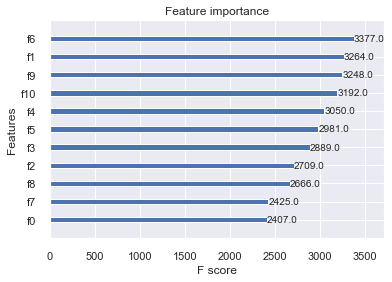

In [810]:
from xgboost import plot_importance

# plot feature importance
plot_importance(model, height=0.3)
plt.show()

The above figure displays the most important features for the model w.r.t their F scores. 
{'volatile acidity': f9, 'sulphates': f10, 'alcohol': f6, 'total sulfur dioxide': f1, 'chlorides': f4, 'citric acid': f5, 'free sulfur dioxide': f3, 'pH': f2, 'density': f8, 'residual sugar': f7, 'fixed acidity': f0}

#### Comparison of models

In [811]:
#Details of all the models in comparison
models_df=pd.DataFrame(model_comparison).T
models_df.columns=['Model Accuracy','Model F1-Score','CV Accuracy']
models_df=models_df.sort_values(by='Model F1-Score',ascending=False)
models_df.style.format("{:.2%}").background_gradient(cmap='Greens')

,Model Accuracy,Model F1-Score,CV Accuracy
XGboost,83.62%,84.02%,84.64%
Random Forest,82.24%,82.81%,81.84%
SVC,79.14%,80.32%,78.60%
Decision Tree,77.59%,77.78%,76.53%
Logistic Regression,57.93%,59.60%,60.83%


The XGBoost model performs best among all the other models in terms of f1-score and accuracy. Random Forest also performs with a decent accuracy.

#### Best model

In [813]:
model = XGBClassifier(n_estimators=180, learning_rate=0.1, max_depth=7)
model = model.fit(X_train,y_train)

In [814]:
test = [[7.4, 0.7, 0.6, 1.3, 0.056, 19, 65, 0.9965, 3.17, 0.59, 10]]

In [815]:
yhat = model.predict(test)

In [816]:
print("prediction: ", yhat)

prediction:  [2]


A prediction of 2 means the quality of wine at index 2, which is 5.

The Advantages of the model:
1. It has built-in regularization (L1 and L2) methods which help to prevent overfitting issues.
2. It has built-in capability to handle missing data.
3. Faster computation.
4. Uses the weakly predicted outcomes, boosts them to strong learners by adjusting hyperparameters like learning rate, weights, iterations, estimators etc.

Drawbacks:
1. Prune to overfitting since oversampling is conducted.
2. Takes more training time.
3. Since outliers are handled, we cannot say how the model performs when outlier data is fed into it.


## Without SMOTE Sampling

In [25]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,stratify=y,random_state=0)

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# The class column for the XGBoost Algorithm has to start from 0
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

le.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [30]:
model = XGBClassifier(n_estimators=180, learning_rate=0.1, max_depth=7)
model = model.fit(X_train,y_train)
    
y_pred = model.predict(X_test)
xgb_acc = accuracy_score(y_test,y_pred)
xgb_f1 = metrics.f1_score(y_pred,y_test,average='weighted')

kfold = KFold(n_splits=5)
xgb_cv = cross_val_score(model,X_train,y_train,cv=kfold)

In [31]:
important = model.feature_importances_

Features_important={}
featureNames = X.columns.values

for i in range(len(important)):
    Features_important[featureNames[i]]=important[i]
    
Important_features = dict(sorted(Features_important.items(),key= lambda x:x[1],reverse=True))
print(Important_features)

{'alcohol': 0.19784711, 'sulphates': 0.105988756, 'volatile acidity': 0.10466151, 'total sulfur dioxide': 0.08427344, 'fixed acidity': 0.08099409, 'free sulfur dioxide': 0.07942259, 'pH': 0.07608462, 'residual sugar': 0.073445484, 'citric acid': 0.070962034, 'chlorides': 0.06604314, 'density': 0.060277194}


In [33]:
print(f"Accuracy of the XGBoost model: {round(xgb_acc*100, 2)}%\n")
print(f"f1 score of the XGBoost model: {round(xgb_f1*100, 2)}%\n")
print(f"Cross validation accuracy of the XGBoost model: {round(np.mean(xgb_cv)*100, 2)}%\n")

target_names = ['3', '4', '5', '6', '7', '8']
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

Accuracy of the XGBoost model: 67.25%

f1 score of the XGBoost model: 69.13%

Cross validation accuracy of the XGBoost model: 62.69%

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.71      0.82      0.76        97
           6       0.66      0.66      0.66        92
           7       0.57      0.41      0.48        29
           8       0.50      0.33      0.40         3

    accuracy                           0.67       229
   macro avg       0.41      0.37      0.38       229
weighted avg       0.64      0.67      0.65       229



In [34]:
test = [[7.4, 0.7, 0.6, 1.3, 0.056, 19, 65, 0.9965, 3.17, 0.59, 10]]

In [35]:
yhat = model.predict(test)
print("prediction: ", yhat)

prediction:  [4]


A prediction of 2 means the quality of wine at index 2, which is 5. Since SMOTE is not applied there is change in the prediction from the previous model where SMOTE was applied.